# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')
np.random.seed(42)

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [ ]:
n = 100
cl = 0.95 #confidence level

def draw_confidence_interval(title, estimator, estimator_label, T1, T2, sample, ymin, ymax):
  x_axis = np.arange(1, n + 1, 1)
  plt.figure(figsize=(15, 8))
  plt.title('Confidence interval for '+title)
  plt.plot(x_axis, estimator, label=estimator_label)
  plt.fill_between(x_axis, T1, T2, alpha=0.2)
  plt.scatter(x_axis, sample, alpha=0.2, label="sample")
  plt.xlabel('sample size')
  plt.ylim(ymin, ymax)
  plt.legend()
  plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

$P(X_{(n)}>t)=α \Leftrightarrow 1-P(X_{(n)}\le t)=1-(\frac{t}{θ})^n=α \\ 
t=\sqrt[n]{1-\alpha}*θ \\ 
T_1(x) = X_{(n)} (поскольку\ \theta\ge X_{(n)}),\ T_2(x) = \frac{X_{(n)}}{\sqrt[n]{1-\alpha}}$

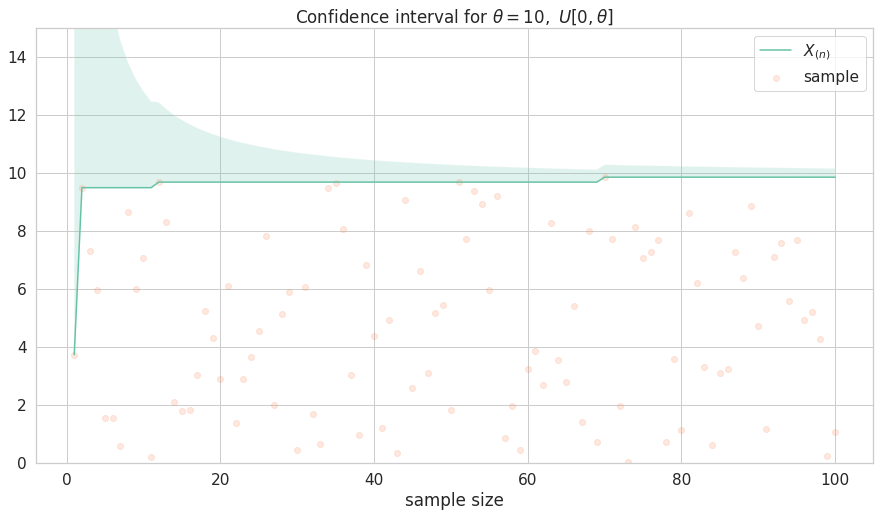

In [ ]:
sample = sps.uniform(scale=10).rvs(size=n)
maximum = np.maximum.accumulate(sample, axis=0)
n_arr = np.arange(1, n + 1, 1)
T1 = maximum
T2 = maximum/(1-cl)**(1/n_arr)

draw_confidence_interval(r'$\theta=10, \ U[0,\theta]$', maximum, '$X_{(n)}$', T1, T2, sample, 0, 15)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

По теореме о выборочной медиане (для распределения Коши):

$ \sqrt{n}(\mu-\theta) \xrightarrow{d_{\theta}} N(0, \frac{π^2}{4})\ \Rightarrow\
\frac{2\sqrt{n}(\mu-\theta)}{\pi}\xrightarrow{d_{\theta}} N(0, 1)\\ 
P(z_{\frac{1-\alpha}{2}}< \frac{2\sqrt{n}(\mu-\theta)}{\pi} < z_{\frac{1+\alpha}{2}}) \rightarrow \alpha\\ 
P(-\frac{\pi z_{\frac{1+\alpha}{2}}}{2\sqrt{n}} +\mu< \theta < -\frac{\pi z_{\frac{1-\alpha}{2}}}{2\sqrt{n}} +\mu) \rightarrow \alpha$

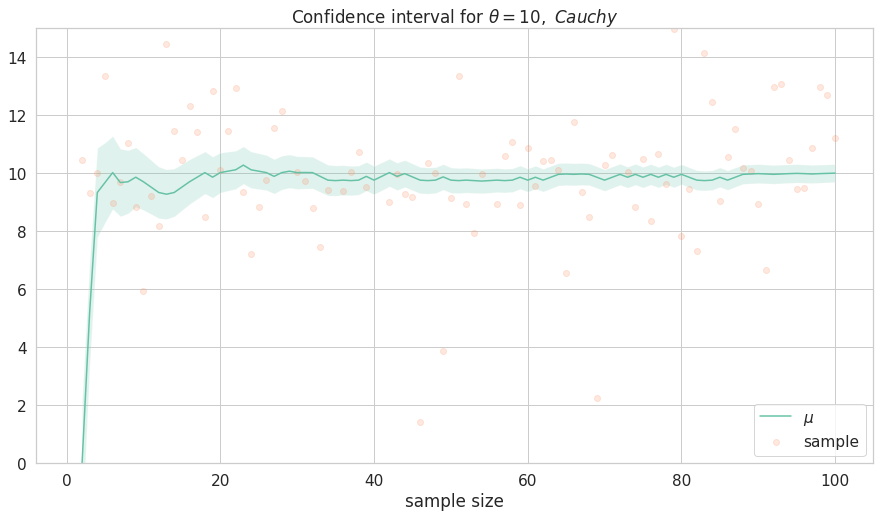

In [ ]:
sample = sps.cauchy(loc=10, scale=1).rvs(size=n)
median = [np.median(sample[:i]) for i in range(n)]
n_arr = np.arange(1, n + 1, 1)
T1 = -np.pi * sps.norm().ppf((1+cl)/2)/(2* n_arr**0.5) + median
T2 = -np.pi * sps.norm().ppf((1-cl)/2)/(2* n_arr**0.5) + median

draw_confidence_interval(r'$\theta=10, \ Cauchy$', median, '$\mu$', T1, T2, sample, 0, 15)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

$\frac{\sqrt{n}(\overline{X}-\theta)}{\sqrt{\theta}} \xrightarrow{d_{\theta}} N(0, 1)$ по ЦПТ, тогда
$ \frac{\sqrt{n}(\overline{X}-\theta)}{\sqrt{\overline{X}}} \xrightarrow{d_{\theta}} N(0, 1)$

$P(z_{\frac{1-\alpha}{2}}< \frac{\sqrt{n}(\overline{X}-\theta)}{\sqrt{\overline{X}}} < z_{\frac{1+\alpha}{2}}) \rightarrow \alpha$  
$P(-\frac{\sqrt{\overline{X}} z_{\frac{1+\alpha}{2}}}{\sqrt{n}} +\overline{X}< \theta < -\frac{\sqrt{\overline{X}} z_{\frac{1-\alpha}{2}}}{\sqrt{n}} +\overline{X}) \rightarrow \alpha$

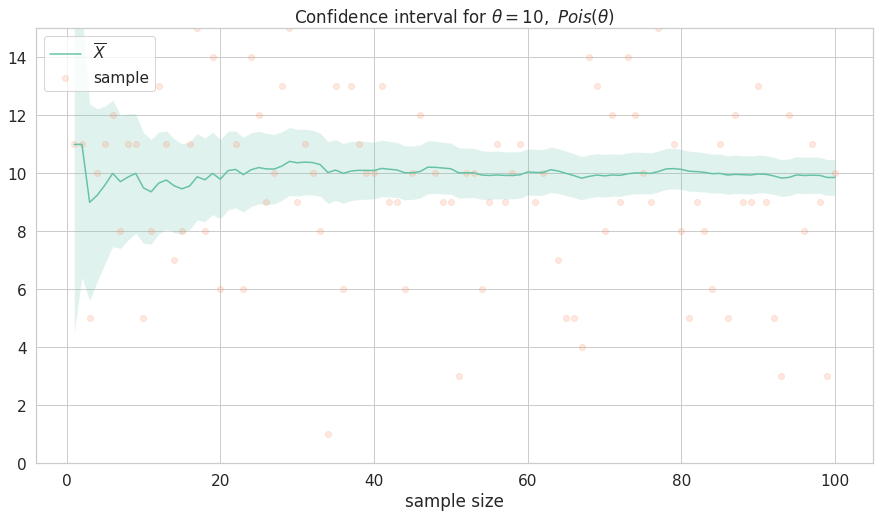

In [ ]:
sample = sps.poisson(mu=10).rvs(size=n)
n_arr = np.arange(1, n + 1, 1)
mean = sample.cumsum()/n_arr
T1 = -mean**0.5 * sps.norm().ppf((1+cl)/2)/(n_arr**0.5) + mean
T2 = -mean**0.5 * sps.norm().ppf((1-cl)/2)/(n_arr**0.5) + mean

draw_confidence_interval(r'$\theta=10, \ Pois(\theta)$', mean, '$\overline{X}$', T1, T2, sample, 0, 15)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

$ \frac{\sqrt{n}(\overline{X}-\frac{\theta}{λ})}{\sqrt{\overline{X}}} \xrightarrow{d_{\theta}} N(0, 1)$

$P(z_{\frac{1-\alpha}{2}}< \frac{\sqrt{n}(\overline{X}-\frac{\theta}{λ})}{\sqrt{\overline{X}}} < z_{\frac{1+\alpha}{2}}) \rightarrow \alpha$  
$P((-\frac{\sqrt{\overline{X}} z_{\frac{1+\alpha}{2}}}{\sqrt{n}} +\overline{X})\lambda< \theta < (-\frac{\sqrt{\overline{X}} z_{\frac{1-\alpha}{2}}}{\sqrt{n}} +\overline{X})\lambda) \rightarrow \alpha$

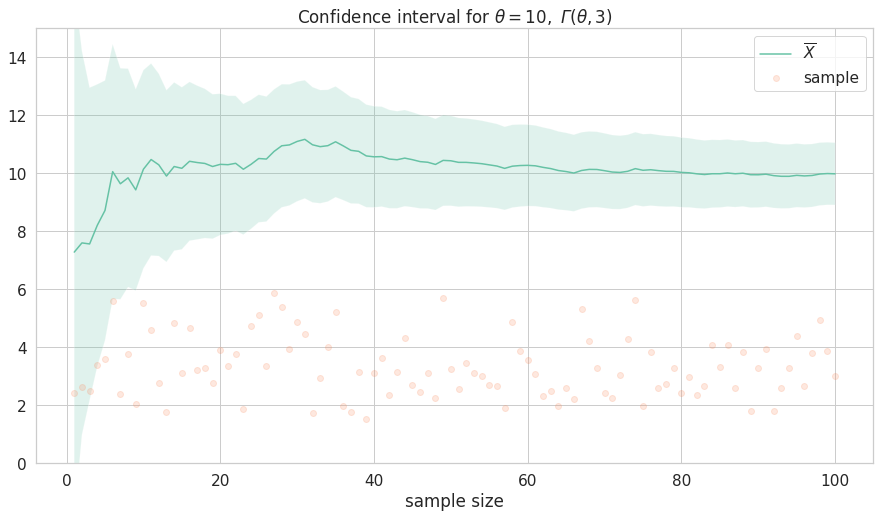

In [ ]:
sample = sps.gamma(a=10, scale=1/3).rvs(size=n)
n_arr = np.arange(1, n + 1, 1)
mean = 3*sample.cumsum()/n_arr
T1 = -(mean/3)**0.5 * sps.norm().ppf((1+cl)/2)/(n_arr**0.5)*3 + mean
T2 = -(mean/3)**0.5 * sps.norm().ppf((1-cl)/2)/(n_arr**0.5)*3 + mean

draw_confidence_interval(r'$\theta=10, \ Г(\theta, 3)$', mean, '$\overline{X}$', T1, T2, sample, 0, 15)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

Все дов. интервалы уменьшаются с ростом выборки. Для равномерного распределения и распределения Коши это происходит достаточно быстро, а вот в гамма-распределении и распределении Пуассона сходимость медленная. Быстрая сходимость при равномерном распределении может быть обусловлена маленькой дисперсией максимума. Также отметим, что истинные значения оценок почти всегда попадают в дов. интервалы (для всех распределений)

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__ Чем больше, тем точнее будет оценка. Нижняя оценка на количество выборок: кол-во*P(не попасть в интервал) $\ge$ 1, вероятность не попасть - это $1-\alpha$, значит, надо взять хотя бы 20.

In [ ]:
sample_num = 1000
n = 100

### Равномерное распределение

In [ ]:
samples = sps.uniform(scale=10).rvs((sample_num, n))
res = []

for sample in samples:
  maximum = np.max(sample, axis=0)
  T1 = maximum
  T2 = maximum/((1-cl)**(1/n))
  res.append(T1<=10<=T2)
    

np.array(res).mean()

0.944

### Распределение Коши

In [ ]:
samples = sps.cauchy(loc=10, scale=1).rvs((sample_num, n))
res = []

for sample in samples:
  median = np.median(sample)
  T1 = -np.pi * sps.norm().ppf((1+cl)/2)/(2* n**0.5) + median
  T2 = -np.pi * sps.norm().ppf((1-cl)/2)/(2* n**0.5) + median
  res.append(T1<=10<=T2)

np.array(res).mean()

0.954

### Распределение Пуассона

In [ ]:
samples = sps.poisson(mu=10).rvs((sample_num, n))
res = []

for sample in samples:
  mean = sample.mean()
  T1 = -mean**0.5 * sps.norm().ppf((1+cl)/2)/(n**0.5) + mean
  T2 = -mean**0.5 * sps.norm().ppf((1-cl)/2)/(n**0.5) + mean
  res.append(T1<=10<=T2)

np.array(res).mean()

0.94

### Гамма-распределение

In [ ]:
samples = sps.gamma(a=10, scale=1/3).rvs((sample_num, n))
res = []

for sample in samples:
  mean = 3*sample.mean()
  T1 = -(mean/3)**0.5 * sps.norm().ppf((1+cl)/2)/(n**0.5)*3 + mean
  T2 = -(mean/3)**0.5 * sps.norm().ppf((1-cl)/2)/(n**0.5)*3 + mean
  res.append(T1<=10<=T2)

np.array(res).mean()

0.999

Сделайте выводы.

Во всех случаях наши оценки близки к значению уровня доверия, что хорошо (проверяла на нескольких запусках). Самая высокая точность у гамма-распределения, у которого самые широкие дов. интервалы.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

$(\overline{X}\mp \frac{t_{\frac{1+α}{2},\,n-1}s}{\sqrt{n}})$

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

$(\overline{X}\mp \frac{z_{\frac{1+α}{2}}s}{\sqrt{n}})$, где s - исправленная дисперсия

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [ ]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    n = sample.size
    n_arr = np.arange(1, n + 1, 1)
    mean = sample.cumsum()/n_arr
    sqrt_variance = ((sample**2).cumsum()/n_arr - mean**2)**0.5
    delta = sps.t(df=n_arr-1).ppf((alpha+1)/2)*sqrt_variance/n_arr**0.5

    return mean-delta, mean+delta

In [ ]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    n = sample.size
    n_arr = np.arange(1, n + 1, 1)
    mean = sample.cumsum()/n_arr
    sqrt_variance = ((sample**2).cumsum()/n_arr - mean**2)**0.5
    delta = sps.norm.ppf((alpha+1)/2)*sqrt_variance/n_arr**0.5

    return mean-delta, mean+delta

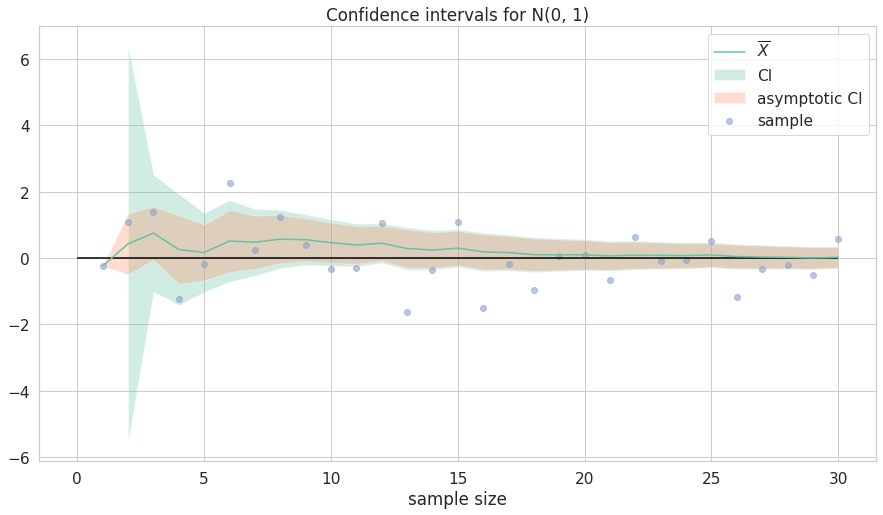

In [ ]:
n = 30
sample = sps.norm.rvs(size=n)
x_axis = np.arange(1, n+1, 1)
mean = sample.cumsum()/x_axis
T1, T2 = calculate_conf_interval(sample)
T1_asymp, T2_asymp = calculate_asymptotic_conf_interval(sample)

plt.figure(figsize=(15, 8))
plt.title('Confidence intervals for N(0, 1)')
plt.plot(x_axis, mean, label='$\overline{X}$')
plt.fill_between(x_axis, T1, T2, alpha=0.3, label='CI')
plt.fill_between(x_axis, T1_asymp, T2_asymp, alpha=0.3, label='asymptotic CI')
plt.scatter(x_axis, sample, alpha=0.6, label="sample")
plt.hlines(y=0, xmin=0, xmax=n)
plt.xlabel('sample size')
plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

Во-первых, стоит отметить, что в жизни мы вряд ли будем знать распределение величин, поэтому придется использовать асимптотический интервал. Во-вторых, как видно из графика асимптотический интервал стремится к точному с ростом размера выборки. Значит, для больших выборок уместно использовать асимптотический дов.интервал.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 39.5MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [ ]:
all_data = pd.read_csv('city_day.csv', parse_dates=['Date'])
df = all_data[['City', 'Date', 'AQI']].dropna()

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head(10)

,City,Date,AQI,Year,Month
28,Ahmedabad,2015-01-29,209.0,2015,1
29,Ahmedabad,2015-01-30,328.0,2015,1
30,Ahmedabad,2015-01-31,514.0,2015,1
31,Ahmedabad,2015-02-01,782.0,2015,2
32,Ahmedabad,2015-02-02,914.0,2015,2
33,Ahmedabad,2015-02-03,660.0,2015,2
34,Ahmedabad,2015-02-04,294.0,2015,2
35,Ahmedabad,2015-02-05,149.0,2015,2
36,Ahmedabad,2015-02-06,190.0,2015,2
37,Ahmedabad,2015-02-07,247.0,2015,2


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
mumbai = df[(df['City'] == 'Mumbai') & (df['Date'] >= '07-01-18')].drop('City', axis=1)
kolkata = df[(df['City'] == 'Kolkata') & (df['Date'] >= '07-01-18')].drop('City', axis=1)

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return df[(df['Year'] == year) & (df['Month'] == month)]['AQI']

In [ ]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    return np.random.choice(sample, size=(k, sample.size))

In [ ]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    
    k = 1000
    samples = get_bootstrap_samples(sample, k)
    estimators = [estimator(sample_bs) for sample_bs in samples]
    estimators.sort()
    return estimators[math.floor(k*(1+alpha)/2)], estimators[math.ceil(k*(1-alpha)/2)]

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
import math

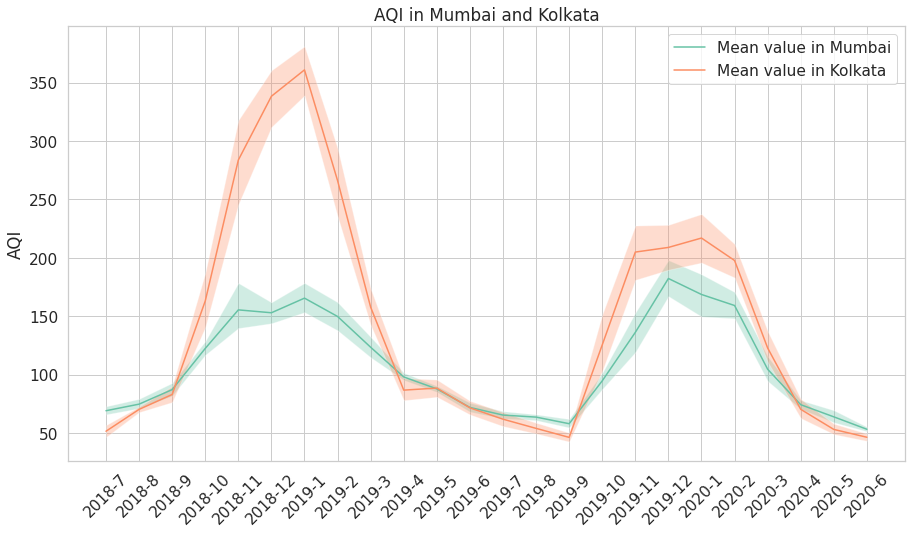

In [ ]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 


mumbai_aqi_mean = []
mumbai_t1 = []
mumbai_t2 = []
kolkata_aqi_mean = []
kolkata_t1 = []
kolkata_t2 = []
for year, month in ym:
  mumbai_dataset = get_dataset_by_month(mumbai, year, month)
  kolkata_dataset = get_dataset_by_month(kolkata, year, month)
  mumbai_aqi_mean.append(mumbai_dataset.mean())
  kolkata_aqi_mean.append(kolkata_dataset.mean())
  t1, t2 = bootstrap_conf_interval(mumbai_dataset)
  mumbai_t1.append(t1)
  mumbai_t2.append(t2)
  t1, t2 = bootstrap_conf_interval(kolkata_dataset)
  kolkata_t1.append(t1)
  kolkata_t2.append(t2)


plt.figure(figsize=(15,8))
plt.title("AQI in Mumbai and Kolkata")
plt.plot(labels, mumbai_aqi_mean, label="Mean value in Mumbai")
plt.fill_between(labels, mumbai_t1, mumbai_t2, alpha = 0.3)
plt.plot(labels, kolkata_aqi_mean, label="Mean value in Kolkata")
plt.fill_between(labels, kolkata_t1, kolkata_t2, alpha = 0.3)
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Пик выбросов приходится на конец осени - начало зимы, это может быть вызвано какими-то природными явлениями или особенностью промышленности городов.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

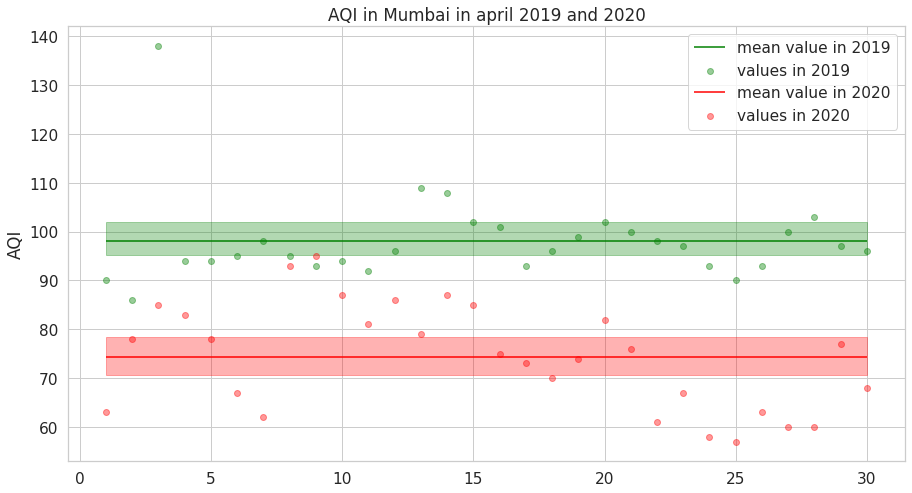

In [ ]:
april_2019 = get_dataset_by_month(mumbai, 2019, 4)
april_2020 = get_dataset_by_month(mumbai, 2020, 4)

mean_2019 = april_2019.mean()
t1_2019, t2_2019 = bootstrap_conf_interval(april_2019)
mean_2020 = april_2020.mean()
t1_2020, t2_2020 = bootstrap_conf_interval(april_2020)

days = np.arange(1, 31)

plt.figure(figsize=(15,8))
plt.title("AQI in Mumbai in april 2019 and 2020")
plt.hlines(y=mean_2019, xmin=1, xmax=30, color='green', label="mean value in 2019")
plt.fill_between(days, t1_2019, t2_2019, color='green', alpha = 0.3)
plt.scatter(days, april_2019, alpha=0.4, color='green', label='values in 2019')
plt.hlines(y=mean_2020, xmin=1, xmax=30, color='red', label="mean value in 2020")
plt.fill_between(days, t1_2020, t2_2020, color='red', alpha = 0.3)
plt.scatter(days, april_2020, alpha=0.4, color='red', label='values in 2020')
plt.ylabel("AQI")
plt.legend()
plt.show()

Теперь проделайте то же самое для Калькутты

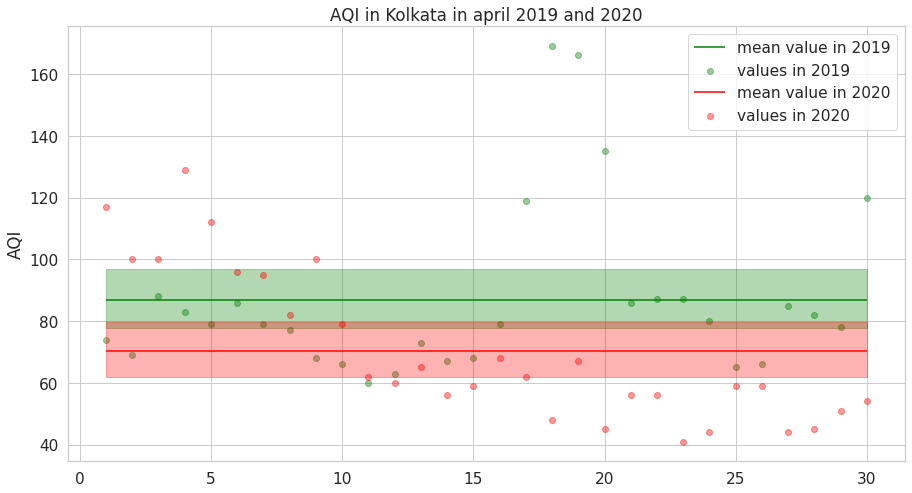

In [ ]:
april_2019 = get_dataset_by_month(kolkata, 2019, 4)
april_2020 = get_dataset_by_month(kolkata, 2020, 4)

mean_2019 = april_2019.mean()
t1_2019, t2_2019 = bootstrap_conf_interval(april_2019)
mean_2020 = april_2020.mean()
t1_2020, t2_2020 = bootstrap_conf_interval(april_2020)

days = np.arange(1, 31)

plt.figure(figsize=(15,8))
plt.title("AQI in Kolkata in april 2019 and 2020")
plt.hlines(y=mean_2019, xmin=1, xmax=30, color='green', label="mean value in 2019")
plt.fill_between(days, t1_2019, t2_2019, color='green', alpha = 0.3)
plt.scatter(days, april_2019, alpha=0.4, color='green', label='values in 2019')
plt.hlines(y=mean_2020, xmin=1, xmax=30, color='red', label="mean value in 2020")
plt.fill_between(days, t1_2020, t2_2020, color='red', alpha = 0.3)
plt.scatter(days, april_2020, alpha=0.4, color='red', label='values in 2020')
plt.ylabel("AQI")
plt.legend()
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

У Калькутты дов. интервалы шире, чем у Мумбаи, и в то же время данные более разбросанные (есть выбросы), а у Мумбаи все значения близки к среднему.